In [5]:
# General Tools
import pandas as pd
import numpy as np
from pandas.tools import plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for data preparation
from sklearn.model_selection import train_test_split

# for ML Classification algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#for model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
train = pd.read_csv('train.csv', index_col = 0)

In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
train.dtypes[train.dtypes != 'object']

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

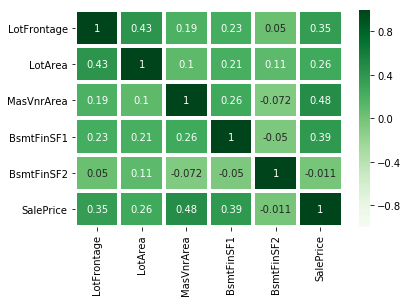

In [13]:
corr_df=train[["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","SalePrice"]].corr()
sns.heatmap(corr_df, cmap = 'Greens', vmax=1.0, vmin = -1.0, linewidth = 3, annot=True)
plt.show()

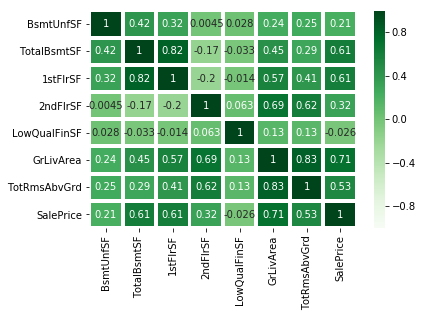

In [14]:
corr_df=train[["BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
              "LowQualFinSF","GrLivArea","TotRmsAbvGrd","SalePrice"]].corr()
sns.heatmap(corr_df, cmap = 'Greens', vmax=1.0, vmin = -1.0, linewidth = 3, annot=True)
plt.show()

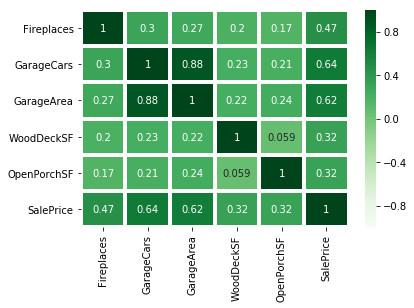

In [15]:
corr_df=train[["Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","SalePrice"]].corr()
sns.heatmap(corr_df, cmap = 'Greens', vmax=1.0, vmin = -1.0, linewidth = 3, annot=True)
plt.show()

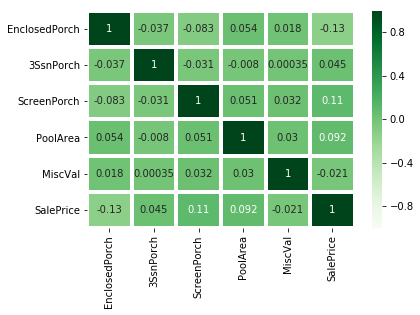

In [16]:
corr_df=train[["EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]].corr()
sns.heatmap(corr_df, cmap = 'Greens', vmax=1.0, vmin = -1.0, linewidth = 3, annot=True)
plt.show()

In [17]:
from sklearn import preprocessing
from matplotlib.pyplot import cm

std_scale=preprocessing.StandardScaler().fit(train[["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","SalePrice"]])
df_std=std_scale.transform(train[["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","SalePrice"]])

data=pd.DataFrame(df_std)
data.head()

print(data.cov())
sns.heatmap(data.cov(),cmap=cm.Blues,annot=True) # korelasi atau hubungan antar variabel
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
std_scale=preprocessing.StandardScaler().fit(train[["BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
              "LowQualFinSF","GrLivArea","TotRmsAbvGrd","SalePrice"]])
df_std=std_scale.transform(train[["BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
              "LowQualFinSF","GrLivArea","TotRmsAbvGrd","SalePrice"]])

data=pd.DataFrame(df_std)
data.head()

print(data.cov())
sns.heatmap(data.cov(),cmap=cm.Blues,annot=True) # korelasi atau hubungan antar variabel
plt.show()

In [ ]:
std_scale=preprocessing.StandardScaler().fit(train[["Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","SalePrice"]])
df_std=std_scale.transform(train[["Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","SalePrice"]])

data=pd.DataFrame(df_std)
data.head()

print(data.cov())
sns.heatmap(data.cov(),cmap=cm.Blues,annot=True) # korelasi atau hubungan antar variabel
plt.show()

In [ ]:
std_scale=preprocessing.StandardScaler().fit(train[["EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]])
df_std=std_scale.transform(train[["EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]])

data=pd.DataFrame(df_std)
data.head()

print(data.cov())
sns.heatmap(data.cov(),cmap=cm.Blues,annot=True) # korelasi atau hubungan antar variabel
plt.show()